Use the iris flowers dataset that you can find in the sklearn package( sklearn.dataset.load_iris) to :

    Train a classical logistic regression model.
    After training your model, get a report detailing the results of your model using the classification metrics we studied in this lesson.
    Take the time to comment on your results and add your thoughts about your model’s performance.


### Logistic Regression

Bellow we we'll be predicting whether the flowers belong to the 2nd class or not

In [1]:
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
iris_data = load_iris()
X = iris_data["data"][:, 3:]
y = (iris_data["target"] == 2).astype(np.int)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [4]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
y_pred = model.predict(X_test)

### Report

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
cnf_matrix = confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[24,  0],
       [ 1,  5]], dtype=int64)

#### Implementing Evaluation metrics from scratch

In [9]:
class Metrics :
    def __init__(self,conf_matrix:np.ndarray) :
        self.tp = cnf_matrix[0,0]
        self.fn = cnf_matrix[0,1]
        self.fp = cnf_matrix[1,0]
        self.tn = cnf_matrix[1,1]
            
    def precision(self)->float:
        return self.tp/(self.tp + self.fp)    

    def negative_predictive_value(self)->float:
        return self.tn/(self.fn + self.tn)

    def recall(self)->float :
        return self.tp/(self.tp + self.fn)

    def specificity(self)->float:
        return self.tn/(self.tn + self.fp)

    def accuracy(self)->float:
        return (self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn)

In [12]:
lr_metrics = Metrics(conf_matrix=cnf_matrix)
print(f"Precision : {lr_metrics.precision()}")
print(f"Negative Predictive Value : {lr_metrics.negative_predictive_value()}")
print(f"Recall (Sensitivity) : {lr_metrics.recall()}")
print(f"Specificity : {lr_metrics.specificity()}")
print(f"Accuracy : {lr_metrics.accuracy()}")

Precision : 0.96
Negative Predictive Value : 1.0
Recall (Sensitivity) : 1.0
Specificity : 0.8333333333333334
Accuracy : 0.9666666666666667


- Precision of 0.96 ===> It means that from all the flowers predicted to be belonging to the class 2, 96% of them were indeed from class 2 and 4% were miss-classified

- Negative Predictive Value : 1.0 ===> It means all the flowers that were predicted to not be belonging to the class 2 were all correctly classified

- Recall (Sensitivity) : 1.0 ===> It means that all the flowers that belongs to the class 2 were all predicted to be belonging to class 2
- Specificity : 0.834 ==> It means from all the flowers that do not belong to class 2, 83% were correctly classified and 17% were miss-classified to be belonging to class 2
- Accuracy : 0.967 ==> It means from all the dataset 96% of the flowers were correctly classified to their true class

#### Scikit-learn Metrics

In [13]:
from sklearn import metrics

In [14]:
print(f"Precision : {metrics.precision_score(Y_test,y_pred)}")
print(f"Recall (Sensitivity) : {metrics.recall_score(Y_test,y_pred)}")
print(f"Accuracy : {metrics.accuracy_score(Y_test,y_pred)}")

Precision : 1.0
Recall (Sensitivity) : 0.8333333333333334
Accuracy : 0.9666666666666667


As we can see the results are the same like the ones implemented before

#### ROC Curve

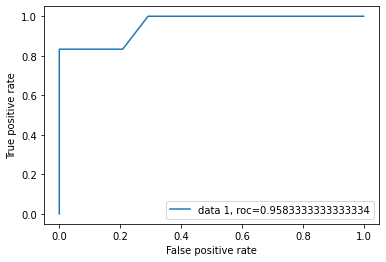

In [15]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
roc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, roc="+str(roc))
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

In [17]:
print(f"Classification Report : \n{metrics.classification_report(Y_test,y_pred)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.97        30

